In [11]:
import pandas as pd

In [13]:
fp="029440.txt"

In [15]:
data = pd.read_csv(
    fp, delim_whitespace=True, na_values=["*", "**", "***", "****", "*****", "******"]
)
data.head()

/tmp/ipykernel_2040/4186475552.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29440,99999,190601010600,90.0,7.0,NaN,NaN,OVC,NaN,NaN,...,1011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29440,99999,190601011300,NaN,0.0,NaN,NaN,OVC,NaN,NaN,...,1015.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29440,99999,190601012000,NaN,0.0,NaN,NaN,OVC,NaN,NaN,...,1016.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29440,99999,190601020600,NaN,0.0,NaN,NaN,CLR,NaN,NaN,...,1016.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29440,99999,190601021300,270.0,7.0,NaN,NaN,OVC,NaN,NaN,...,1015.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All column names

In [18]:
data.columns

Index(['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L',
       'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2',
       'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')

Read only selected columns

In [21]:
data = pd.read_csv(
    fp,
    delim_whitespace=True,
    usecols=["USAF", "YR--MODAHRMN", "TEMP"],
    na_values=["*", "**", "***", "****", "*****", "******"],
)
data.head()

,USAF,YR--MODAHRMN,TEMP
0,29440,190601010600,27.0
1,29440,190601011300,27.0
2,29440,190601012000,25.0
3,29440,190601020600,26.0
4,29440,190601021300,27.0


Rename columns

In [26]:
new_name={"YR--MODAHRMN":"TIME"}
type(new_name)
data=data.rename(columns=new_name)
data.columns


Index(['USAF', 'TIME', 'TEMP'], dtype='object')

Check row col count

In [29]:
data.shape

(408170, 3)

Column data types

In [32]:
data.dtypes

USAF      int64
TIME      int64
TEMP    float64
dtype: object

Add a column and calculate

In [35]:
data["TEMP_C"]=(data["TEMP"]-32)/1.8
data.head()

,USAF,TIME,TEMP,TEMP_C
0,29440,190601010600,27.0,-2.777778
1,29440,190601011300,27.0,-2.777778
2,29440,190601012000,25.0,-3.888889
3,29440,190601020600,26.0,-3.333333
4,29440,190601021300,27.0,-2.777778


Parsing time column into year-month-day-hour-minute

In [38]:
data["TIME"]=data["TIME"].astype(str)

In [81]:
data["YEAR"]= data["TIME"].str.slice(start=0,stop=2)
data["MONTH"]=data["TIME"].str.slice(start=2,stop=4)
data.head()

,USAF,TIME,TEMP,TEMP_C,YEAR,MONTH,DATE
0,29440,190601010600,27.0,-2.777778,19,06,1906-01-01 06:00:00
1,29440,190601011300,27.0,-2.777778,19,06,1906-01-01 13:00:00
2,29440,190601012000,25.0,-3.888889,19,06,1906-01-01 20:00:00
3,29440,190601020600,26.0,-3.333333,19,06,1906-01-02 06:00:00
4,29440,190601021300,27.0,-2.777778,19,06,1906-01-02 13:00:00


Parse using datetime

In [43]:
data["DATE"]=pd.to_datetime(data["TIME"])
data.head()

,USAF,TIME,TEMP,TEMP_C,YEAR,MONTH,DATE
0,29440,190601010600,27.0,-2.777778,19,06,1906-01-01 06:00:00
1,29440,190601011300,27.0,-2.777778,19,06,1906-01-01 13:00:00
2,29440,190601012000,25.0,-3.888889,19,06,1906-01-01 20:00:00
3,29440,190601020600,26.0,-3.333333,19,06,1906-01-02 06:00:00
4,29440,190601021300,27.0,-2.777778,19,06,1906-01-02 13:00:00


Group data

In [45]:
grouped=data.groupby(['YEAR','MONTH'])
data.head()

,USAF,TIME,TEMP,TEMP_C,YEAR,MONTH,DATE
0,29440,190601010600,27.0,-2.777778,19,06,1906-01-01 06:00:00
1,29440,190601011300,27.0,-2.777778,19,06,1906-01-01 13:00:00
2,29440,190601012000,25.0,-3.888889,19,06,1906-01-01 20:00:00
3,29440,190601020600,26.0,-3.333333,19,06,1906-01-02 06:00:00
4,29440,190601021300,27.0,-2.777778,19,06,1906-01-02 13:00:00


Access data by groups

In [47]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [48]:
month=('19', '08')
grouped.get_group(month).head()

,USAF,TIME,TEMP,TEMP_C,YEAR,MONTH,DATE
2188,29440,190801010600,-16.0,-26.666667,19,08,1908-01-01 06:00:00
2189,29440,190801011300,-11.0,-23.888889,19,08,1908-01-01 13:00:00
2190,29440,190801012000,2.0,-16.666667,19,08,1908-01-01 20:00:00
2191,29440,190801020600,14.0,-10.000000,19,08,1908-01-02 06:00:00
2192,29440,190801021300,19.0,-7.222222,19,08,1908-01-02 13:00:00


In [55]:
grouped["TEMP"].mean()

YEAR  MONTH
19    06       41.468493
      07       38.526075
      08       39.618613
      09       39.307130
      10       41.589580
      11       40.670320
      12       38.783242
      13       41.086758
      14       41.604566
      15       35.279963
      79       27.575456
      80       37.058750
      81       36.860426
      82       39.606796
      83       40.459263
      84       40.752948
      85       35.883285
      86       38.172173
      87       35.645923
      88       39.196205
      89       42.581943
      90       41.715726
      91       40.911841
      92       41.123517
      93       39.210654
      94       39.201106
      95       40.966434
      96       38.504363
      97       35.121524
      98       38.574755
      99       40.207392
20    00       42.343614
      01       39.581273
      02       40.802251
      03       39.462486
      04       40.472416
      05       43.529330
Name: TEMP, dtype: float64

Create a new dataframe with mean values from each group

In [57]:
temp=pd.DataFrame()

In [59]:
temp["MEAN_TEMP"]=grouped["TEMP"].mean()
temp["YY"]=grouped["YEAR"].first()
temp["MM"]=grouped["MONTH"].first()
temp.head()

MEAN_TEMP  YY  MM
YEAR MONTH                   
19   06     41.468493  19  06
     07     38.526075  19  07
     08     39.618613  19  08
     09     39.307130  19  09
     10     41.589580  19  10

<AxesSubplot:xlabel='YEAR,MONTH'>

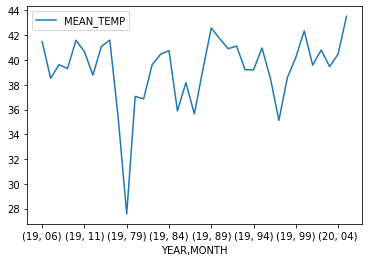

In [144]:
temp.plot()

Limit values to see on a plot

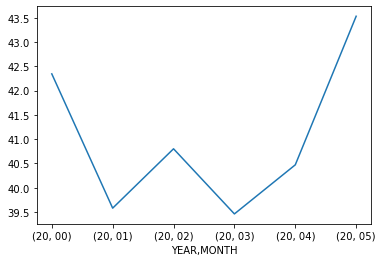

In [119]:
ax=temp["MEAN_TEMP"].loc[temp.index>=('20','00')]
px=ax.plot()

Plot style

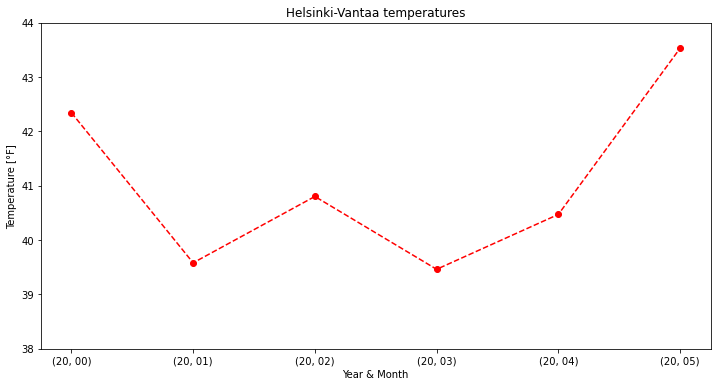

In [137]:
px=ax.plot(
    style="ro--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Year & Month",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    ylim=[38,44]
)

Bar plot

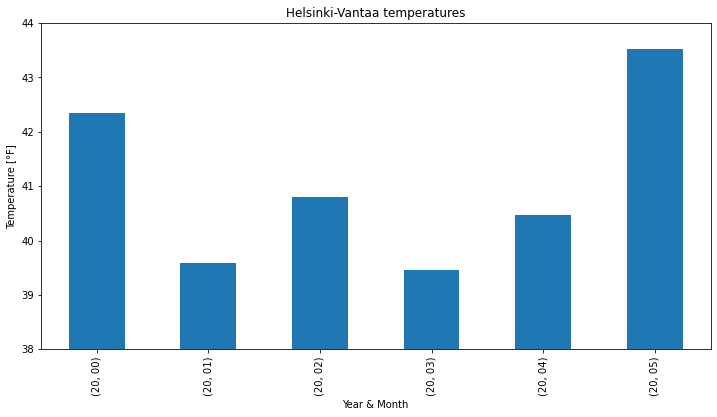

In [139]:
px=ax.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Year & Month",
    ylabel="Temperature [°F]",
    figsize=(12, 6),
    ylim=[38,44]
)

Save plot

In [ ]:
plt.savefig("barplot.png")